# Authors
# ----------------------------------------

## Kiara Gabriel             -    2161334

## Phola Bavuma          -    1848739

## Shravan Singh         -    2173638

## Arneev Singh          -    2180393

# ----------------------------------------

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy as copy

In [2]:
#Constants
tabSpace = 30
learningRate = 0.1


#NOTE: You can adjust this value to display the amount of floating points
floatingDigits = 5

In [3]:
#Helper Function - Prints Question
def printQues(questionNumber):
    ans = "Question (" + questionNumber + ")"
    
    hashes = ""
    for i in range(len(ans)):
        hashes += '='
    
    print(ans)
    print(hashes)
    
def printConfusionMatrix(correct0, incorrect0,correct1,incorrect1):
    amountDataPoints = correct0 + incorrect0 + correct1 +incorrect1
    print("Confusion Matrix")
    print("====================")
    print("Class\t0\t1")
    print("0\t"+str(correct0)+"\t"+str(incorrect0))
    print("1\t"+str(incorrect1)+"\t"+str(correct1))
    print("\nAccuracy is "+ str(((correct0 + correct1)/(amountDataPoints))*100) + "%")
    print("====================\n")
    
    return (correct0 + correct1)/amountDataPoints

In [4]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def derivSigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

def norm2(new,old):
    fsum = 0.0
    
    newLst = new[0]
    oldLst = old[0]
    
    for i in range(len(newLst)):
        for j in range(len(newLst[i])):
            fsum += (newLst[i][j] - oldLst[i][j])**2
    
    newLst = new[1]
    oldLst = old[1]
    
    for i in range(len(newLst)):
        for j in range(len(newLst)):
            fsum += (newLst[i][j] - oldLst[i][j])**2
    
    return fsum ** (0.5)

In [5]:
#Dot Product
def myDot(inputVec,thetaMat):
    ansLst = []
    
    for thetaLst in thetaMat:
        isum = 0
        
        for i in range(len(thetaLst)):
            isum += thetaLst[i] * inputVec[i]
        
        ansLst.append(isum)
        
    return ansLst
    

In [6]:
class Node:
    def __init__(self):
        self.value = 1.0
        self.weights = []
        self.error = 0.0
    
    def setValue(self, value):
        self.value = value
    
    def addWeight(self, weight):
        self.weights.append(weight)
        
    def getWeight(self, index):
        return self.weights[index]
    
    def setError(self, errorVal):
        self.error = errorVal
        
    def getError(self):
        return self.error

In [7]:
class Layer:
    def __init__(self, size):
        self.nodes = []
        
        for i in range(size):
            self.nodes.append(Node())
            
    def __str__(self):
        lst = []
        
        for i in range(self.getSize()):
            lst.append(self.nodes[i].value)
            
        return str(lst)
    
    def __getitem__(self, index):
        return self.nodes[index]
        
    def getSize(self):
        return len(self.nodes)
        
    def setNodeValue(self, index, value):
        self.nodes[index].setValue(value)
        
    def setNodeError(self, index, error):
        self.nodes[index].setError(error)
    
    def addNodeWeight(self, index, weight):
        self.nodes[index].addWeight(weight)
    
    def addNode(self, node):
        self.nodes.append(node)
        
    def updateNode(self, index, value):
        self.nodes[index].value = value
    
    def getNodeValue(self,index):
        return self.nodes[index].value
    
    def getNodeWeights(self, index):
        return self.nodes[index].weights
    
    def getNodesValue(self):
        lst = []
        for node in self.nodes:
            lst.append(node.value)
        
        return lst
    
    def getNodesWeight(self):
        lst = []
        
        for i in range(len(self.nodes[0].weights)):
            lst.append([])
        
        for node in self.nodes:
            weightIndex = 0
            for weight in node.weights:
                lst[weightIndex].append(weight)
                weightIndex += 1
                
        return lst
    
    def getAmountWeightPerNode(self):
        return len(self.nodes[0].weights)
    
    def clearWeights(self):
        for node in self.nodes:
            node.weights = []

In [8]:
class NeuralNetwork:
    def __init__(self, nodeLst):
        
        self.nodeLst = nodeLst
        self.layers = []
        
        for numberNodes in nodeLst:
            self.layers.append(Layer(numberNodes))
            
        
        self.amountLayers = len(nodeLst)
    
    def setInputLayer(self, inputValues):
        
        #Making sure they fit
        if (len(inputValues) != self.layers[0].getSize() - 1):
            print("Input Values cannot fit into Input Layer")
            print("Input Values is:")
            print(inputValues)
            print("Input Layer is:")
            print(self.layers[0])
            print("Remember there is no input value for the first(bias) node")
            return
        
        self.inputValues = inputValues
        
        #Setting Bias Node = 1
        self.layers[0].setNodeValue(0,1)
        
        #Setting Other Nodes to Input Values
        for i in range(len(inputValues)):
            self.layers[0].setNodeValue(i+1,inputValues[i])
            
    
    def printNetwork(self,showWeights=False):
        
        #get maxAmountNodes of layers
        maxAmountNodes = 0  
        for layer in self.layers:
            size = layer.getSize()
            if (size > maxAmountNodes):
                maxAmountNodes = size
        
        #Add empty list for maxAmountNodes
        valueLst = []
        weightsLst = []
        for i in range(maxAmountNodes):
            valueLst.append([])
            weightsLst.append([])
        
        #Adding all nodes to layerLst
        for i in range(len(self.layers)):
            for j in range(self.layers[i].getSize()):
                valueLst[j].append(self.layers[i].getNodeValue(j))
                weightsLst[j].append(self.layers[i].getNodeWeights(j))
                
                
        #Printing out layerLst
        for row in valueLst:
            sLine = ""
            for val in row:
                sLine += str(("{:."+str(floatingDigits)+"}").format(float(val))) + '\t'
            
            print(sLine)
            
        if (showWeights):
            print()
            for row in weightsLst:
                sLine = ""
                for val in row:
                    if (type(val) == list):
                        tempLst = []
                        for e in val:
                            tempLst.append(("{:."+str(floatingDigits)+"}").format(float(e)))
                        
                        sLine += str(tempLst) + '\t'
                        continue
                    sLine += str(("{:."+str(floatingDigits)+"}").format(float(val))) + '\t'

                print(sLine.expandtabs(tabSpace))
            
        
    def setWeights(self, weights):
        self.orignalWeights = weights
        #For each layer in weight
        for layerIndex in range(len(weights)):
            thetaMat = weights[layerIndex]
            self.layers[layerIndex].clearWeights()
            
            #For each thetaLst in thetaMat (this is for one layer)
            for thetaLst in thetaMat:
                
                for nodeIndex in range(len(thetaLst)):
                    self.layers[layerIndex].addNodeWeight(nodeIndex, thetaLst[nodeIndex])
        

    def setActivationFunction(self, activationFunction):
        self.activationFunction = activationFunction
                
        
    def forwardPropagation(self):
        #Getting weights of node
        
        #For each layer
        for layerIndex in range(len(self.layers)):
            #If last layer then continue
            if (layerIndex == len(self.layers) - 1):
                continue
                
            layer = self.layers[layerIndex]
            nextLayer = self.layers[layerIndex + 1]
            
            nodeVals = layer.getNodesValue()
            nodeWeights = layer.getNodesWeight()

            dotProduct = myDot(nodeVals,nodeWeights)
            
            if (type(dotProduct) == float):
                nextLayer.setNodeValue(1,self.activationFunction(dotProduct))
                return
            
            for i in range(len(dotProduct)):
                if (layerIndex == len(self.layers) -2):
                    nextLayer.setNodeValue(i,self.activationFunction(dotProduct[i]))
                    return
                
                nextLayer.setNodeValue(i+1,self.activationFunction(dotProduct[i]))
                
        outputLayer = self.layers[len(self.layers) -1]
        outputNodeValue = outputLayer.getNodeValue(0)
        
        outputLayer.setNodeValue(0,self.activationFunction(outputNodeValue))
            
    def getOutput(self):
        return (self.layers[len(self.layers)-1].getNodeValue(0))
            
    def resetNetwork(self):
        for layer in self.layers:
            for node in layer.nodes:
                node.value = 1
                node.weights = []
        
        
    def setActualOutputs(yLst):
        self.actualOutputs = yLst
    
    def backwardPropagation(self, yActual, learningRate=0.1):
        amountLayers = len(self.layers)
        
        #Updating the output layer's last hidden layer
        yCalc = self.getOutput()
        yActual = yActual

        lastNodeVal = self.layers[amountLayers - 1].getNodeValue(0)

        #Calculating error of output
        errorOutput = (yActual - yCalc)*derivSigmoid(lastNodeVal)
        
        #Setting output node error
        self.layers[amountLayers - 1].setNodeError(0,errorOutput)

        #Updating previous layers weights
        for prevNodeIndex, prevNode in enumerate(self.layers[amountLayers - 2].nodes):
            
            #DeltaW and updating the weight
            prevNode.weights[0] += learningRate * errorOutput * prevNode.value
            
    
        #End of Updating the output layer's last hidden layer  
        
        
        
        #Updating all previous hidden layers
        lastHiddenLayerIndex = amountLayers - 2
        
        #From second last hidden layer to first hidden layer
        for layerIndex in range(lastHiddenLayerIndex,0,-1):
            currLayer = self.layers[layerIndex]
            nextLayer = self.layers[layerIndex + 1]
            prevLayer = self.layers[layerIndex - 1]
            
            #For every node in this layer
            for currNodeIndex, currNode in enumerate(currLayer.nodes):
                if (currNodeIndex == 0):
                    continue
                
                #Get currNodeError
                currNodeError = 0.0
                
                #Getting error for currNode from each next node
                for nextNodeIndex, nextNode in enumerate(nextLayer):
                    currNodeError += nextNode.error * currNode.weights[nextNodeIndex]
                    
                #Getting average error for node
                currNodeError /= len(currLayer.nodes)
                
                currNode.setError(currNodeError)
                #Get currNodeError - Done
                
                #===============================
                
                #Updating weights of prevLayer
                
                for prevNode in prevLayer.nodes:
                    #Updating Weights of the non bias nodes
                    prevNode.weights[currNodeIndex-1] += learningRate * currNodeError * prevNode.value
                    
        
        
                
            
        
    def getWeights(self):
        weights = []
        
        for layer in self.layers:
            weights.append(layer.getNodesWeight())
        
        return weights

In [9]:
#Helper Print Neural Network

def printNeuralWithHelper(inputVec, neuralNetwork, questionNumber, func, theta):
    neuralNetwork.resetNetwork()
    neuralNetwork.setInputLayer(inputVec)
    
    printQues(questionNumber)
    
    neuralNetwork.setWeights(theta)
    neuralNetwork.setActivationFunction(func)

    print("Before Forward Propogation")
    neuralNetwork.printNetwork(False)
    print()

    neuralNetwork.forwardPropagation()

    print("Forward Propogation")
    neuralNetwork.printNetwork(False)
    print()

    print("Output")
    print(neuralNetwork.getOutput())



In [10]:
#Question 1
amountNodeLst = [4,3,1]
q1NN = NeuralNetwork(amountNodeLst)

thetaMat = [
    [
        [1,-1,0.5,1]
        ,
        [2,-2,1,-1]
    ]
    ,
    [
        [-1,2,1]
    ]
]

In [11]:
inputVal1 = [0,3,-1]

printNeuralWithHelper(inputVal1, q1NN, "1a-i",sigmoid, thetaMat)

Question (1a-i)
Before Forward Propogation
1.0	1.0	1.0	
0.0	1.0	
3.0	1.0	
-1.0	

Forward Propogation
1.0	1.0	0.83654	
0.0	0.81757	
3.0	0.99753	
-1.0	

Output
0.8365359392688426


In [12]:
inputVal2 = [1,2,1]

printNeuralWithHelper(inputVal2, q1NN, "1a-ii",sigmoid, thetaMat)


Question (1a-ii)
Before Forward Propogation
1.0	1.0	1.0	
1.0	1.0	
2.0	1.0	
1.0	

Forward Propogation
1.0	1.0	0.81648	
1.0	0.8808	
2.0	0.73106	
1.0	

Output
0.8164760997195802


In [13]:
inputVal3 = [-1,1,2]

printNeuralWithHelper(inputVal3, q1NN, "1a-iii",sigmoid, thetaMat)

Question (1a-iii)
Before Forward Propogation
1.0	1.0	1.0	
-1.0	1.0	
1.0	1.0	
2.0	

Forward Propogation
1.0	1.0	0.87332	
-1.0	0.98901	
1.0	0.95257	
2.0	

Output
0.8733158426540304


In [14]:
#Question 1b

#Intializing and reseting the neural network
def printWithBackprop(neuralNet, inputVec, thetaMat, func, learningRate, targetVal):
    neuralNet.resetNetwork()
    neuralNet.setInputLayer(inputVec)
    neuralNet.setWeights(thetaMat)
    neuralNet.setActivationFunction(func)

    neuralNet.forwardPropagation()
    neuralNet.backwardPropagation(targetVal,learningRate)

    neuralNet.printNetwork(True)
    print()
    
    print("Input Layer Weights\tHidden Layer Weights\tOutput Layer Weights".expandtabs(tabSpace))
    print()

printQues("1b")
print()

printWithBackprop(q1NN, [0,3,-1], thetaMat, sigmoid, learningRate, 0)
printWithBackprop(q1NN, [1,2,1], thetaMat, sigmoid, learningRate, 1)
printWithBackprop(q1NN, [-1,1,2], thetaMat, sigmoid, learningRate, 0)

Question (1b)

1.0	1.0	0.83654	
0.0	0.81757	
3.0	0.99753	
-1.0	

['0.98832', '1.9942']         ['-1.0176']                   []                            
['-1.0', '-2.0']              ['1.9856']                    
['0.46497', '0.98267']        ['0.9824']                    
['1.0117', '-0.99422']        

Input Layer Weights           Hidden Layer Weights          Output Layer Weights

1.0	1.0	0.81648	
1.0	0.8808	
2.0	0.73106	
1.0	

['1.0026', '2.0013']          ['-0.9961']                   []                            
['-0.99739', '-1.9987']       ['2.0034']                    
['0.50521', '1.0026']         ['1.0029']                    
['1.0026', '-0.9987']         

Input Layer Weights           Hidden Layer Weights          Output Layer Weights

1.0	1.0	0.87332	
-1.0	0.98901	
1.0	0.95257	
2.0	

['0.98801', '1.9941']         ['-1.0181']                   []                            
['-0.98801', '-1.9941']       ['1.9821']                    
['0.48801', '0.99406']        [

## Question 2(a)

In [15]:
#Question 2(a)

def f(x):
    return (x**2)*(math.sin(2*math.pi*x))+0.7

printQues("2a")

Question (2a)


## Question 2(b) & 2(c)

Question (2b & 2c)


<function matplotlib.pyplot.show(close=None, block=None)>

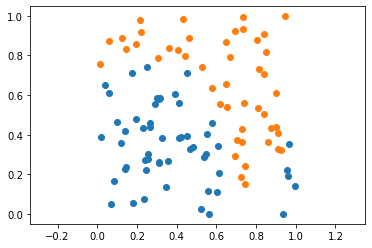

In [16]:
#Question 2(b) and 2(c)

def dataPoints(class0_points_x, class0_points_y, class1_points_x, class1_points_y):
    
    dataset = np.random.uniform(0,1,size=(100,2))
    classes = np.zeros(100)
    class0 = [class0_points_x,class0_points_y]

    class1 = [class1_points_x,class1_points_y]

    for i in range(100):
        if(f(dataset[i][0])> (dataset[i][1])):
            classes[i] = 0
            class0_points_x.append(dataset[i][0])
            class0_points_y.append(dataset[i][1])
        else:
            classes[i] = 1
            class1_points_x.append(dataset[i][0])
            class1_points_y.append(dataset[i][1])


printQues("2b & 2c")
            
class0_points_x = []
class0_points_y = []

class1_points_x = []
class1_points_y = []
    
dataPoints(class0_points_x, class0_points_y, class1_points_x, class1_points_y)

plt.scatter(class0_points_x,class0_points_y)
plt.scatter(class1_points_x,class1_points_y)
plt.axis('equal')
plt.show

In [17]:
## Question 3a
def check(thetas):
    for i in range(len(thetas) -1):
        for a in range(len(thetas) ):
            if(i == a):
                continue
            x = thetas[i]
            y = thetas[a]
            if(x == y):
                y = np.random.uniform(0,1)
                thetas[a] = y
        

def createTheataMatrix(N1firstThetas, N2firstThetas, N3firstThetas, SecondLayerThetas):
    thetaMatrix = [
        [
            N1firstThetas
            ,
            N2firstThetas
            ,
            N3firstThetas
        ]
        ,
        [
            SecondLayerThetas
        ]
    ]

    return thetaMatrix

def getThetas(nodelist):
        
    N1firstThetas = np.random.uniform(0,1,size=3)
    check(N1firstThetas)

    N2firstThetas = np.random.uniform(0,1,size=3)
    check(N2firstThetas)

    N3firstThetas = np.random.uniform(0,1,size=3)
    check(N3firstThetas)

    SecondLayerThetas = np.random.uniform(0,1,size = 4)
    check(SecondLayerThetas)
    
    thetaMatrix = createTheataMatrix(N1firstThetas, N2firstThetas, N3firstThetas, SecondLayerThetas)
    
    return thetaMatrix


nodelist = [3,4,1]
q3NN =  NeuralNetwork(nodelist)

thetaMatrix = getThetas(nodelist)
N1firstThetas = thetaMatrix[0][0]
N2firstThetas = thetaMatrix[0][1]
N3firstThetas = thetaMatrix[0][2]
SecondLayerThetas = thetaMatrix[1][0]

printQues("3a")
print()

print(N1firstThetas)
print(N2firstThetas)
print(N3firstThetas)
print(SecondLayerThetas)
print(" ")

print(thetaMatrix) 

Question (3a)

[0.60866249 0.40236483 0.96035765]
[0.67038233 0.59186    0.68278269]
[0.37985828 0.26180265 0.76647377]
[0.95177568 0.25946325 0.22133179 0.25813797]
 
[[array([0.60866249, 0.40236483, 0.96035765]), array([0.67038233, 0.59186   , 0.68278269]), array([0.37985828, 0.26180265, 0.76647377])], [array([0.95177568, 0.25946325, 0.22133179, 0.25813797])]]


In [18]:
## Question 3b
## doing forward propagation on the NN for both datasets class 0 and class 1
def FPonClass0(q3NN, thetaMatrix, class0_points_x, class0_points_y, Output0):
    q3NN.setWeights(thetaMatrix)
    q3NN.setActivationFunction(sigmoid)
    
    for i in range(len(class0_points_x)):
        x = class0_points_x[i]
        y = class0_points_y[i]
        arr = [x,y]
        q3NN.setInputLayer(arr)
        q3NN.forwardPropagation()
        Output0.append(q3NN.getOutput()) 
        
    return Output0

    
def FPonClass1(q3NN, thetaMatrix, class1_points_x, class1_points_y, Output1):
    q3NN.setWeights(thetaMatrix)
    q3NN.setActivationFunction(sigmoid)

    for i in range(len(class1_points_x)):
        x = class1_points_x[i]
        y = class1_points_y[i]
        arr = [x,y]
        q3NN.setInputLayer(arr)
        q3NN.forwardPropagation()
        Output1.append(q3NN.getOutput()) 
        
    return Output1


Output0 = []
Output1 = []

Output0 = FPonClass0(q3NN, thetaMatrix, class0_points_x, class0_points_y, Output0)
Output1 = FPonClass1(q3NN, thetaMatrix, class1_points_x, class1_points_y, Output1)

printQues("3b")
print()
print("Class 0")
print("=======")
print()
print(Output0)
print()
print()
print("Class 1")
print("=======")
print()
print(Output1)

Question (3b)

Class 0

[0.8168214824845813, 0.8110904849044421, 0.813288002232884, 0.8165694260678047, 0.8142486168622518, 0.8150505840704027, 0.8181718310594424, 0.8192420375278714, 0.8133182357418478, 0.8137371643051161, 0.8116401429388173, 0.8202578525626865, 0.8137553354836955, 0.816086119286936, 0.8177481617309316, 0.8133240317184244, 0.8154712850986877, 0.820703173527292, 0.8169472699861617, 0.8139256584397443, 0.8136024804868516, 0.8071127287564761, 0.8135976956101255, 0.8177088089171728, 0.8168009430389233, 0.811362418373524, 0.8165838279602748, 0.816545503996455, 0.821318918054548, 0.815415225167078, 0.8146094991192604, 0.8194235409199735, 0.8112124462145419, 0.8116444265224952, 0.8197276781055264, 0.8202172072788373, 0.8134537212571047, 0.8083944822905155, 0.8123687604308786, 0.8093981837098122, 0.8096625584322572, 0.8163122926644477, 0.8186821077208507, 0.8165289080003552, 0.8183246467164426, 0.8173307295402349, 0.816150290582041, 0.8175575778482983, 0.8186432286866596, 0.8

In [19]:
## question 3c
## computing the errors for each output of the NN
FinalErrors = []
FinaL0 = []
FinaL1 = []
for i in Output0:
    FinalErrors.append(0-i)
    FinaL0.append(0- i)
for i in Output1:
    FinalErrors.append(1- i)
    FinaL1.append(1-i)

printQues("3c")
print('\n========================')
print("Total Errors:")
print(len(FinalErrors))
print('========================\n')
print(FinalErrors)

print('\n========================')
print("Total Class 0 Errors:")
print(len(FinaL0))
print('========================\n')
print(FinaL0)


print('\n========================')
print("Total Class 1 Errors:")
print(len(FinaL1))
print('========================\n')
print(FinaL1)

Question (3c)

Total Errors:
100

[-0.8168214824845813, -0.8110904849044421, -0.813288002232884, -0.8165694260678047, -0.8142486168622518, -0.8150505840704027, -0.8181718310594424, -0.8192420375278714, -0.8133182357418478, -0.8137371643051161, -0.8116401429388173, -0.8202578525626865, -0.8137553354836955, -0.816086119286936, -0.8177481617309316, -0.8133240317184244, -0.8154712850986877, -0.820703173527292, -0.8169472699861617, -0.8139256584397443, -0.8136024804868516, -0.8071127287564761, -0.8135976956101255, -0.8177088089171728, -0.8168009430389233, -0.811362418373524, -0.8165838279602748, -0.816545503996455, -0.821318918054548, -0.815415225167078, -0.8146094991192604, -0.8194235409199735, -0.8112124462145419, -0.8116444265224952, -0.8197276781055264, -0.8202172072788373, -0.8134537212571047, -0.8083944822905155, -0.8123687604308786, -0.8093981837098122, -0.8096625584322572, -0.8163122926644477, -0.8186821077208507, -0.8165289080003552, -0.8183246467164426, -0.8173307295402349, -0.816

In [20]:
## question 3d
## calculate for each error in final node
## for each theta

SecondErrorsNode1 = []  ## to store the errors of each node in the hidden layer
SecondErrorsNode2 = []
SecondErrorsNode3 = []

Node1 = [] ## to store the output of each nodes in the hidden layer
Node2 = []
Node3 = []
for i in range(len(FinaL0)): ## calculating the errors of the NN and each node on class 0
        
    SecondNode0 = (1 * N1firstThetas[0])+(class0_points_x[i] *N2firstThetas[0] ) + (class0_points_y[i] * N3firstThetas[0])##calculating the error of the 1st nonbias node in the secondlayer on class 0 input
    Node1.append(sigmoid(SecondNode0))
    error = SecondLayerThetas[1] * FinaL0[i] * (sigmoid(SecondNode0)*(1 - sigmoid(SecondNode0)))
    
    SecondErrorsNode1.append(error)
    
    SecondNode1 = (1 * N1firstThetas[1])+(class0_points_x[i] *N2firstThetas[1] ) + (class0_points_y[i] * N3firstThetas[1])
    Node2.append(sigmoid(SecondNode1))
    error1 = SecondLayerThetas[2] * FinaL0[i] * (sigmoid(SecondNode1)*(1 - sigmoid(SecondNode1)))
    
    SecondErrorsNode2.append(error1)
    
    SecondNode2 = (1 * N1firstThetas[2])+(class0_points_x[i] *N2firstThetas[2] ) + (class0_points_y[i] * N3firstThetas[2])
    Node3.append(sigmoid(SecondNode2))
    error2 = SecondLayerThetas[2] * FinaL0[i] * (sigmoid(SecondNode2)*(1 - sigmoid(SecondNode2)))
    
    SecondErrorsNode3.append(error2)


for i in range(len(FinaL1)):## Calculating the errors of the NN and each node on class 1 
    SecondNode0 = (1 * N1firstThetas[0])+(class1_points_x[i] *N2firstThetas[0] ) + (class1_points_y[i] * N3firstThetas[0])
    Node1.append(sigmoid(SecondNode0))
    error = SecondLayerThetas[1] * FinaL1[i] * (sigmoid(SecondNode0)*(1 - sigmoid(SecondNode0)))
    
    SecondErrorsNode1.append(error)
    
    SecondNode1 = (1 * N1firstThetas[1])+(class1_points_x[i] *N2firstThetas[1] ) + (class1_points_y[i] * N3firstThetas[1])
    Node2.append(sigmoid(SecondNode1))
    error1 = SecondLayerThetas[2] * FinaL1[i] * (sigmoid(SecondNode1)*(1 - sigmoid(SecondNode1)))
    
    SecondErrorsNode2.append(error1)
    
    SecondNode2 = (1 * N1firstThetas[2])+(class1_points_x[i] *N2firstThetas[2] ) + (class1_points_y[i] * N3firstThetas[2])
    Node3.append(sigmoid(SecondNode2))
    error2 = SecondLayerThetas[2] * FinaL1[i] * (sigmoid(SecondNode2)*(1 - sigmoid(SecondNode2)))
    
    SecondErrorsNode3.append(error2)        

In [21]:
##question 3D 
SecondLayerDelta = [0,0,0,0]
FirstLayerDeltaNode1 = [0,0,0]
FirstLayerDeltaNode2 = [0,0,0]
FirstLayerDeltaNode3 = [0,0,0]




for  i in range(len(FinalErrors)):
    SecondLayerDelta[0] = SecondLayerDelta[0] + 0 *FinalErrors[i]
    
##for node 1s theta
for i in range(len(FinalErrors)):
    SecondLayerDelta[1] = SecondLayerDelta[1] + Node1[i]*FinalErrors[i] 
##for node 2s theta
for i in range(len(FinalErrors)):
    SecondLayerDelta[2] = SecondLayerDelta[2] + Node2[i]*FinalErrors[i]
##for node 3s theta
for i in range(len(FinalErrors)):
    SecondLayerDelta[3] = SecondLayerDelta[3] + Node3[i]*FinalErrors[i]

## for node 1f theta

##first for class 0
    for x in range (len(SecondErrorsNode1)):
        FirstLayerDeltaNode1[0] = FirstLayerDeltaNode1[0] + SecondErrorsNode1[x]
        FirstLayerDeltaNode1[1] = FirstLayerDeltaNode1[1] + SecondErrorsNode1[x]
        FirstLayerDeltaNode1[2] = FirstLayerDeltaNode1[2] + SecondErrorsNode1[x]

## for node 2f theta
for i in range(len(FirstLayerDeltaNode2)):
    for x in range (len(SecondErrorsNode2)):
        FirstLayerDeltaNode2[i] = FirstLayerDeltaNode2[i] + SecondErrorsNode2[x]
## for node 3f theta
for i in range(len(FirstLayerDeltaNode3)):
    for x in range (len(SecondErrorsNode3)):
        FirstLayerDeltaNode3[i] = FirstLayerDeltaNode3[i] + SecondErrorsNode3[x]


In [22]:
printQues("3d")
print('\n========================')
print("Second Layer, Node 1:")
print('========================\n')
print(SecondErrorsNode1)

print('\n========================')
print("Second Layer, Node 2:")
print('========================\n')
print(SecondErrorsNode2)


print('\n========================')
print("Second Layer, Node 3:")
print('========================\n')
print(SecondErrorsNode3)

print()

print('\n========================')
print("First Layer, Node 1:")
print('========================\n')
print(FirstLayerDeltaNode1)

print('\n========================')
print("First Layer, Node 2:")
print('========================\n')
print(FirstLayerDeltaNode2)


print('\n========================')
print("First Layer, Node 3:")
print('========================\n')
print(FirstLayerDeltaNode3)

Question (3d)

Second Layer, Node 1:

[-0.04239609127244051, -0.04164806649471959, -0.04381035491786645, -0.040495882893662905, -0.042490156159398516, -0.04414597072343213, -0.03514961791448842, -0.041134282502404945, -0.040952126131427326, -0.04472602407662021, -0.045138955753424075, -0.03985101599074819, -0.04306314022724346, -0.04211338547325261, -0.038805625462709756, -0.04566747181149461, -0.044368338444635176, -0.03401106535282942, -0.040902680814042205, -0.043519086999752196, -0.043108732547223555, -0.046832876252912506, -0.04042017536326768, -0.04393401880524545, -0.04106940070561126, -0.04524777343847953, -0.03984504691346351, -0.04315502368477261, -0.040725158111638154, -0.03966156375465476, -0.0368384067613307, -0.0384115256614478, -0.04196090655610383, -0.04340933472495535, -0.039906203899114805, -0.04192118229385598, -0.04363882641007534, -0.045676782933277864, -0.044077620275870304, -0.04497388970018752, -0.04613912089736438, -0.04074824017672406, -0.041480021612305566, -

In [23]:
#Question 3e

q3NN.setWeights(thetaMatrix)
q3NN.setActivationFunction(sigmoid)
outputLst = []

for i in range(len(SecondLayerDelta)):
    outputLst.append(np.dot(learningRate,([SecondErrorsNode1[i],SecondErrorsNode2[i], SecondErrorsNode3[i]])))

printQues("3e")
print()
print(outputLst)

Question (3e)

[array([-0.00423961, -0.00403415, -0.00270731]), array([-0.00416481, -0.00393226, -0.00294375]), array([-0.00438104, -0.00409671, -0.00296715]), array([-0.00404959, -0.00390129, -0.00261506])]


In [24]:
##Question 3F

## updating thetas
for i in range(len(SecondLayerDelta)):
    SecondLayerThetas[i] = SecondLayerThetas[i] + learningRate*(SecondLayerDelta[i])


for i in range(len(FirstLayerDeltaNode1)):
    N1firstThetas[i] = N1firstThetas[i] + learningRate*(FirstLayerDeltaNode1[i])
    
for i in range(len(FirstLayerDeltaNode2)):
    N2firstThetas[i] = N2firstThetas[i] + learningRate*(FirstLayerDeltaNode2[i])
    
for i in range(len(FirstLayerDeltaNode3)):
    N3firstThetas[i] = N3firstThetas[i] + learningRate*(FirstLayerDeltaNode3[i])

In [25]:
##Question 3G

def trainNetwork(network, epsi,maxCount, class0x, class0y, class1x, class1y, actiFunc, thetaMatrix,learningRate):
    count = 0
    Difference = 1000
    network.resetNetwork()
    network.setWeights(thetaMatrix)
    network.setActivationFunction(actiFunc)

    while count < maxCount and Difference > epsi:

        maxIterations = max(len(class0x), len(class1x))
        class0Size = len(class0x)
        class1Size = len(class1x)

        old = copy.deepcopy(network.getWeights())
        new = copy.deepcopy(network.getWeights())
        for i in range(maxIterations):

            if (i < class0Size):
                arr = [class0x[i],class0y[i]]
                
                network.setInputLayer(arr)
                network.forwardPropagation()
                network.backwardPropagation(0, learningRate)
                
                old = copy.deepcopy(new)
                new = network.getWeights()
                Difference = norm2(new,old)

            if (i < class1Size):
                arr = [class1x[i],class1y[i]]
                
                network.setInputLayer(arr)
                network.forwardPropagation()
                network.backwardPropagation(1, learningRate)
                
                old = copy.deepcopy(new)
                new = network.getWeights()
                Difference = norm2(new,old)

            if(Difference < epsi):
                break

        count += 1
    return count
    
print(trainNetwork(q3NN, 0.05, 1000, class0_points_x, class0_points_y,class1_points_x,class1_points_y, sigmoid, thetaMatrix, learningRate))

1


In [26]:
##Question 3H

# Generate 100 data points
validation0_points_x = []
validation0_points_y = []

validation1_points_x = []
validation1_points_y = []
    
dataPoints(validation0_points_x, validation0_points_y, validation1_points_x, validation1_points_y)

# Get output
OutP0 = []
OutP1 = []

for i in range(len(validation0_points_x)):
    x = validation0_points_x[i]
    y = validation0_points_y[i]
    arr = [x,y]
    q3NN.setInputLayer(arr)
    q3NN.forwardPropagation()
    OutP0.append(q3NN.getOutput()) 

for i in range(len(validation1_points_x)):
    x = validation1_points_x[i]
    y = validation1_points_y[i]
    arr = [x,y]
    q3NN.setInputLayer(arr)
    q3NN.forwardPropagation()
    OutP1.append(q3NN.getOutput()) 

# Round the output points

class0_output = []
class1_output = []

correctClass0 = 0
incorrectClass0 = 0

correctClass1 = 0
incorrectClass1 = 0

for i in range(len(OutP0)):
    
    
    # data points class 0 
    if (OutP0[i] >= 0.5):
        incorrectClass0 += 1
        class0_output.append(1)
    else:
        correctClass0 += 1
        class0_output.append(0)


for i in range(len(OutP1)):
    # data points class 1 
    if (OutP1[i] >= 0.5):
        correctClass1 += 1
        class1_output.append(1)
    else:
        incorrectClass1 += 1
        class1_output.append(0)
        
        
printConfusionMatrix(correctClass0, incorrectClass0,correctClass1,incorrectClass1)

print("I noticed that it is always printintout class 0, I think this is because the learning rate and epsilon values were not ideal and therefore the neural network never train properly/accurately")

Confusion Matrix
Class	0	1
0	65	0
1	35	0

Accuracy is 65.0%

I noticed that it is always printintout class 0, I think this is because the learning rate and epsilon values were not ideal and therefore the neural network never train properly/accurately


In [27]:
##Question 3I

aVals = [0.1, 0.01, 0.005, 0.001]
epsilonVals = [0.5, 0.05, 0.01, 0.005, 0.001]
maxAccu = 0
optimalLearningRate = 0
optimalEpsilon = 0

# Generate 100 data points
validation0_points_x = []
validation0_points_y = []

validation1_points_x = []
validation1_points_y = []
    
dataPoints(validation0_points_x, validation0_points_y, validation1_points_x, validation1_points_y)



for aVal in aVals:
    for epsilonVal in epsilonVals:
        print("=====================")
        print("a is: " + str(aVal))
        print("Epsilon is: " + str(epsilonVal))
        print("=====================\n")
        print(trainNetwork(q3NN, epsilonVal, 1000, class0_points_x, class0_points_y,class1_points_x,class1_points_y, sigmoid, thetaMatrix, aVal))
        print()
        
        # Get output
        OutP0 = []
        OutP1 = []

        for i in range(len(validation0_points_x)):
            x = validation0_points_x[i]
            y = validation0_points_y[i]
            arr = [x,y]
            q3NN.setInputLayer(arr)
            q3NN.forwardPropagation()
            OutP0.append(q3NN.getOutput()) 

        for i in range(len(validation1_points_x)):
            x = validation1_points_x[i]
            y = validation1_points_y[i]
            arr = [x,y]
            q3NN.setInputLayer(arr)
            q3NN.forwardPropagation()
            OutP1.append(q3NN.getOutput()) 

        # Round the output points

        class0_output = []
        class1_output = []

        correctClass0 = 0
        incorrectClass0 = 0

        correctClass1 = 0
        incorrectClass1 = 0

        for i in range(len(OutP0)):


            # data points class 0 
            if (OutP0[i] >= 0.5):
                incorrectClass0 += 1
                class0_output.append(1)
            else:
                correctClass0 += 1
                class0_output.append(0)


        for i in range(len(OutP1)):
            # data points class 1 
            if (OutP1[i] >= 0.5):
                correctClass1 += 1
                class1_output.append(1)
            else:
                incorrectClass1 += 1
                class1_output.append(0)


        accu = printConfusionMatrix(correctClass0, incorrectClass0,correctClass1,incorrectClass1)
        print()
        
        if (accu > maxAccu):
            maxAccu = accu
            optimalLearningRate = aVal
            optimalEpsilon = epsilonVal
            
print()
print("Optimal Learning Rate is: " + str(optimalLearningRate))
print("Optimal Epsilon is: " + str(optimalEpsilon))

a is: 0.1
Epsilon is: 0.5

1

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.1
Epsilon is: 0.05

1

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.1
Epsilon is: 0.01

1000

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.1
Epsilon is: 0.005

1000

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.1
Epsilon is: 0.001

1000

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.01
Epsilon is: 0.5

1

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.01
Epsilon is: 0.05

1

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.01
Epsilon is: 0.01

1

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.01
Epsilon is: 0.005

1

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.01
Epsilon is: 0.001

1

Confusion Matrix
Class	0	1
0	53	0
1	47	0

Accuracy is 53.0%


a is: 0.005
Epsilon is: 0.5

1

Confusion Matrix
Class

In [28]:
##Question 3J
trainNetwork(q3NN, optimalEpsilon, 1000, class0_points_x, class0_points_y,class1_points_x,class1_points_y, sigmoid, thetaMatrix, optimalLearningRate)

# Generate 100 data points
test0_points_x = []
test0_points_y = []

test1_points_x = []
test1_points_y = []
    
dataPoints(test0_points_x, test0_points_y, test1_points_x, test1_points_y)
# Get output
OutP0 = []
OutP1 = []

for i in range(len(test0_points_x)):
    x = test0_points_x[i]
    y = test0_points_y[i]
    arr = [x,y]
    q3NN.setInputLayer(arr)
    q3NN.forwardPropagation()
    OutP0.append(q3NN.getOutput()) 

for i in range(len(test1_points_x)):
    x = test1_points_x[i]
    y = test1_points_y[i]
    arr = [x,y]
    q3NN.setInputLayer(arr)
    q3NN.forwardPropagation()
    OutP1.append(q3NN.getOutput()) 

# Round the output points

class0_output = []
class1_output = []

correctClass0 = 0
incorrectClass0 = 0

correctClass1 = 0
incorrectClass1 = 0

for i in range(len(OutP0)):
    
    
    # data points class 0 
    if (OutP0[i] >= 0.5):
        incorrectClass0 += 1
        class0_output.append(1)
    else:
        correctClass0 += 1
        class0_output.append(0)


for i in range(len(OutP1)):
    # data points class 1 
    if (OutP1[i] >= 0.5):
        correctClass1 += 1
        class1_output.append(1)
    else:
        incorrectClass1 += 1
        class1_output.append(0)
        
        
printConfusionMatrix(correctClass0, incorrectClass0,correctClass1,incorrectClass1)

Confusion Matrix
Class	0	1
0	44	0
1	56	0

Accuracy is 44.0%



0.44

In [29]:
# Question 3(k)

# It is important to have all 3 common data sets because,

# Training Set
#=============

# We need an actual data set to let our algorithm learn from 
# otherwise I algorithm would not be able to predict anything
# therefore, having no use to us (ML will be useless)

# Validation Set
#===============

# As seen in this lab, different a (or alpha) values and threshold values
# (for our stopping condition) can and will majorly impact how good our 
# algorithm will be at predicting values. We therefore use the validation
# data set to go through and find the most effective a (or alpha) and 
# threshold values

# We use it for fine-tuning our hyperparameters!

# Testing Set
#============

# We need to actually put our algorithm into action! We need to make sure
# we never overfit our data. We simulate what a real-life example would be
# by merely giving a data set the algorithm never interact with before.
# i.e. the testing data set. We can tell if we overfitted our data
# and also we can just see how our algorithm does in general without having
# to physically get/wait for real world data.

## Question 3(k)

### It is important to have all 3 common data sets because,

### Training Set
=============

We need an actual data set to let our algorithm learn from 
otherwise I algorithm would not be able to predict anything
therefore, having no use to us (ML will be useless)

### Validation Set
===============

As seen in this lab, different a (or alpha) values and threshold values
(for our stopping condition) can and will majorly impact how good our 
algorithm will be at predicting values. We therefore use the validation
data set to go through and find the most effective a (or alpha) and 
threshold values

We use it for fine-tuning our hyperparameters!

### Testing Set
============

We need to actually put our algorithm into action! We need to make sure
we never overfit our data. We simulate what a real-life example would be
by merely giving a data set the algorithm never interact with before.
i.e. the testing data set. We can tell if we overfitted our data
and also we can just see how our algorithm does in general without having
to physically get/wait for real world data.